In [212]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import requests
import shutil
from textwrap import wrap

In [213]:
gene2lit = pd.read_csv('../data/pubtator_title_or_abstract_in_any_gene2pubmed_paper_no_reviews.csv')

In [214]:
gene_info = pd.read_csv('../data/gene_info_221228.csv')

In [215]:
genes = np.unique(gene_info['gene_ncbi'])

In [438]:
gene_otd = np.random.choice(genes)

In [439]:
gene_slice = gene_info[gene_info['gene_ncbi'] == gene_otd]

In [440]:
gene_symbol = gene_slice['symbol_ncbi'].values[0]
gene_name = gene_slice['description'].values[0]

In [441]:
pdb_id = gene_slice['pdb_id'].values[0]
structure_title = gene_slice['structure_title'].values[0]

In [442]:
print(pdb_id)

3TKJ


In [443]:
url = 'https://www.ebi.ac.uk/pdbe/static/entry/' + \
gene_slice['pdb_id'].values[0].lower() + \
'_assembly_1_chain_front_image-800x800.png'
filename = '../img/' + pdb_id.lower() + '.png'

r = requests.get(url, stream = True)

if r.status_code == 200:
    with open(filename,'wb') as f:
        shutil.copyfileobj(r.raw, f)
else:
    print('Image Couldn\'t be retrieved')

In [444]:
img = mpl.image.imread(filename)

In [445]:
gene2lit_slice = gene2lit[gene2lit['gene_ncbi'] == gene_otd]

In [446]:
groupby_year = gene2lit_slice.groupby('year').count().reindex(range(1950,2021)).fillna(0.0)['pubmed_id']

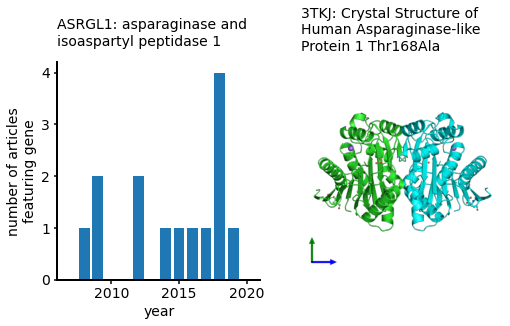

In [447]:
fig, axes = plt.subplots(figsize=(8,4), nrows=1, ncols=2, gridspec_kw={'width_ratios':[1,1]})

axes[0].bar(height=groupby_year, x=groupby_year.index)
min_year = gene2lit_slice['year'].min() - 2
min_year = np.min([min_year, 2009])
axes[0].set_xlim([min_year, 2021])
axes[0].tick_params(labelsize=14, axis='both', width=1.5)
axes[0].set_xlabel('year', fontsize=14)
axes[0].set_ylabel('number of articles\nfeaturing gene', fontsize=14)
axes[0].set_ylabel('number of articles\nfeaturing gene', fontsize=14)

title_str = gene_symbol + ': ' + gene_name
title_str = '\n'.join(wrap(title_str, width=30))
axes[0].set_title(title_str, x=0, y=1.05, ha='left', fontsize=14)
    
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
[axes[0].spines[i].set_linewidth(2) for i in axes[0].spines]

title_str = pdb_id + ': ' + structure_title
axes[1].imshow(img)
axes[1].axis(False)
axes[1].set_title('\n'.join(wrap(title_str, width=30)), fontsize=14, va='bottom', ha='left', x=0, y=1.05)

plt.savefig('../img/' + str(gene_otd) + '.png', dpi=200, bbox_inches='tight', facecolor='white', transparent=False)